**Exercise 7.1**  
Using data from the NSFG, make a scatter plot of birth weight versus mother’s age.  
Plot percentiles of birth weight versus mother’s age.  
Compute Pearson’s and Spearman’s correlations.  
How would you characterize the relationship between these variables?

**IMPORTANT!** [ThinkStats2](https://github.com/AllenDowney/ThinkStats2) should be cloned ../.. relative to this dir.

In [38]:
import sys
import os
import math

import numpy as np
import pandas as pd
import scipy

In [2]:
import thinkstats2_path
import nsfg, thinkstats2, thinkplot

In [12]:
# Load pregnancy data:
preg = nsfg.ReadFemPreg()
# Keep only live births that have age and weight:
live = preg[preg.outcome == 1].dropna(subset=['agepreg', 'totalwgt_lb'])
age = live.agepreg
weight = live.totalwgt_lb

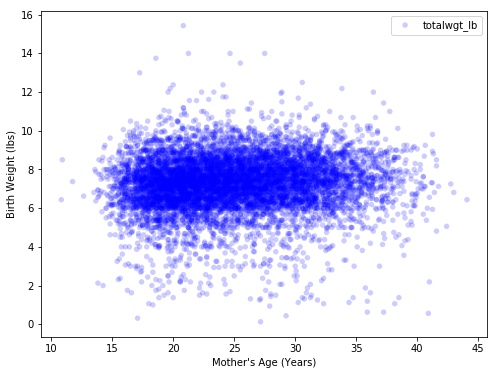

In [18]:
# Scatter plot weight vs. age:
thinkplot.Scatter(age, weight)
thinkplot.Show(xlabel="Mother's Age (Years)", ylabel='Birth Weight (lbs)')

In [35]:
# Percentile plot weight vs. age:
# Divide age into bins of 1 year:
bins = np.arange(10, 50, 1)
groups = live.groupby(np.digitize(age, bins))
# For percentile age use the mean in each group:
p_age = [group.agepreg.mean() for _, group in groups]
# For percentile weight use the actual percentile, hence compuet CDF's:
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for _, group in groups]

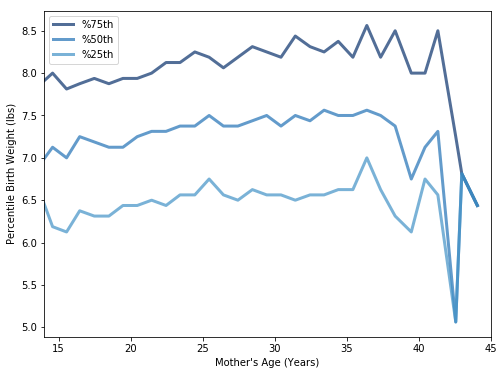

In [36]:
for p in [75, 50, 25]:
    p_weight = [cdf.Percentile(p) for cdf in cdfs]
    thinkplot.Plot(p_age, p_weight, label='%{}th'.format(p))
thinkplot.Config(xlabel="Mother's Age (Years)", ylabel='Percentile Birth Weight (lbs)',
                 xlim=[14, 45],
                 legend=True)
thinkplot.Show()

In [41]:
p_cor = scipy.stats.pearsonr(age, weight)[0]
s_cor = scipy.stats.spearmanr(age, weight)[0]
print("Pearson's={:.6f}, Spearman's={:.6f}".format(p_cor, s_cor))

Pearson's=0.068834, Spearman's=0.094610


**Conclusions:**
  1. There is little (linear) correlation between age and weight as shown by both the scatter plot and the correlation coeficients.
  2. Spearman's correlation is greater than Pearson's due to some outliers
  3. The percentile plot shows a non-linear relationship with weight increasing more quickly till age 25, then slower till age 37 after which it moves to a decreasing relationship.